In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
#import networkx as nx
import re 

path = "c:/Facultad/Tesis/"
base = pd.read_csv(path+'Corpus_medios_nac.csv')
#base2 = pd.read_csv(path+'Corpus_medios_nac.csv', nrows=20, skiprow

C:\Users\Asus\AppData\Local\Temp\ipykernel_21304\694573758.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv(path+'Corpus_medios_nac.csv')


In [2]:
def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    
    return x

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)

def words_length(x):
    return len(x.split(" "))

In [3]:
base['nota'] = base['nota'].apply(replace)
base['citas']  = base['nota'].apply(extract_quotes)

In [ ]:
np.where(type(base['nota']) == float)
np.where(np.isnan(base['nota'] == True))

type(1.1) is float

True

In [4]:
df_quoutes2 = pd.DataFrame({'Fecha': base['fecha'].iloc[1:], 'Hora': base['hora'].iloc[1:], 'Citas': base['citas'].iloc[1:], 'Link': base['link'].iloc[1:], 'Nota': base['nota'].iloc[1:]})
df_quoutes = df_quoutes2.explode('Citas') # Cada cita sea una fila distinta
df_quoutes = df_quoutes.dropna(subset=['Citas']) # Elimino la filas que no haya quotes

#df_quoutes['Citas'] = df_quoutes['Citas'].apply(replace)

df_quoutes = df_quoutes.reset_index()
df_quoutes = df_quoutes.drop(['index'], axis = 1)
df_quoutes['Cant_Palabras'] = df_quoutes['Citas'].apply(words_length) # genero columna que cuente la cantidad de plabaras
df_quoutes_pf = df_quoutes[df_quoutes['Cant_Palabras'] > 4]
df_quoutes_pf = df_quoutes_pf[df_quoutes_pf['Cant_Palabras'] < 60]
df_quoutes_pf = df_quoutes_pf.reset_index()
df_quoutes_pf = df_quoutes_pf.drop(['index'], axis = 1)


In [6]:
np.where(df_quoutes_pf['Cant_Palabras'] == max(df_quoutes_pf['Cant_Palabras']))

df_quoutes_pf.sort_values(by= ['Cant_Palabras'], ascending = False)[0:5]

,Fecha,Hora,Citas,Link,Nota,Cant_Palabras
1878467,2018/09/03,NaN,"Lamentablemente no todos entienden esto, como ...",https://www.diarioprensa.com.ar/gorbacz-el-cam...,"El ministro Jefe de Gabinete Leonardo Gorbacz,...",59
1374552,2019/02/21,15:43,Observamos nuevas tendencias y también muchas...,https://misionesonline.net/2019/02/21/la-yerba...,Una comitiva integrada por seis establecimient...,59
1865126,2020/08/28,18:48,Desde el Gobierno se trabaja para que el salar...,https://www.elliberal.com.ar/noticia/economia/...,La ministra de Desarrollo Territorial y Hábit...,59
2062287,2021/05/28,NaN,Me sorprende (el fallo) porque las pruebas dic...,https://www.losprimeros.tv/nota/politica/26327...,"Esta tarde, el Tribunal Oral de Menores 2 de C...",59
452973,2021/02/09,NaN,"La Matanza no es grande, es grandiosa y lo es ...",https://www.pagina12.com.ar/322809-espinoza-fi...,"El intendente de La Matanza, Fernando Espinoza...",59


In [23]:
num = 1879260
print(df_quoutes_pf['Citas'][num])
print(df_quoutes_pf['Link'][num])

Estamos trabajando con tiempo, hace casi un año que lo hacemos con el Federal Fueguino y recientemente con Somos TDF, somos un encuentro programático, queremos ser sólidos y presentarnos ante la comunidad como una opción electoral clara, con la suficiente anticipación y previsibilidad como las que queremos dar desde los lugares a los que podamos acceder cuando seamos electos
https://www.diarioprensa.com.ar/referentes-de-la-concertacion-fueguina-recorrieron-diferentes-barrios-de-rio-grande/


las frases de lkvec tienen en promedio 16 palabras y con un maximo de 1712

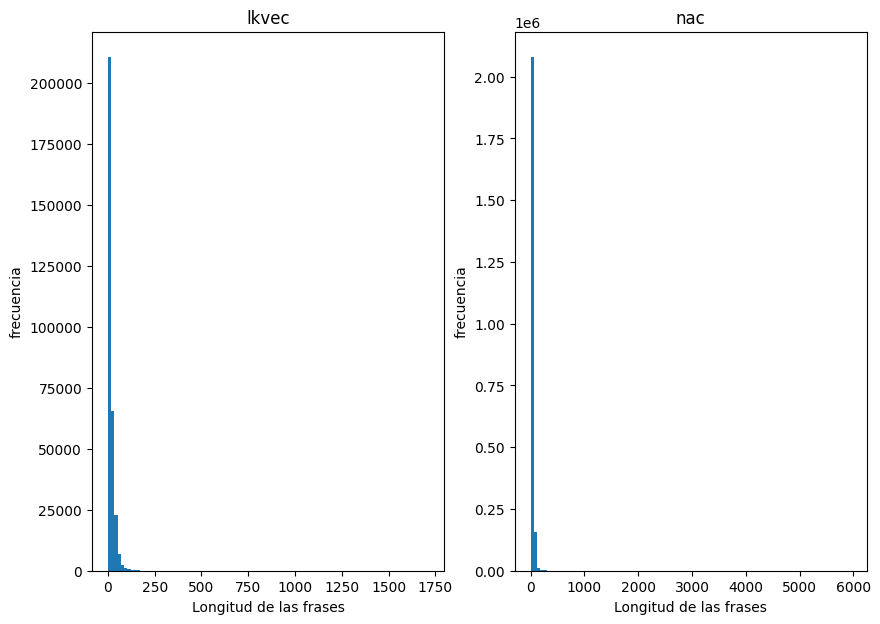

In [102]:
import matplotlib.pyplot as plt

lkvec = pd.read_csv(path+'all_data.csv')
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,7))
titles = ['lkvec', 'nac']
data = [lkvec['len'], df_quoutes_pf['Cant_Palabras']]
for i,ax in enumerate([ax1, ax2]):
    ax.hist(data[i], bins = np.linspace(0,max(data[i]), 100))
    ax.set_xlabel('Longitud de las frases')
    ax.set_ylabel('frecuencia')
    ax.set_title(titles[i])
plt.show()

In [112]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

a = model.encode(lkvec['phrases'][:10])
a[0]

array([-2.21558008e-02,  6.63395748e-02,  5.53568639e-02,  2.47053206e-02,
       -7.16889277e-02,  3.22862994e-03,  4.08154391e-02, -2.75777057e-02,
       -9.11479965e-02, -1.14120543e-02,  2.88396925e-02, -5.39754517e-02,
       -6.12482727e-02,  8.91649071e-03,  4.11491804e-02,  6.21872991e-02,
        1.47094214e-02,  2.26784218e-02, -1.23631366e-01,  3.80378142e-02,
       -3.29656117e-02, -1.08780619e-02,  4.20261659e-02,  2.15464104e-02,
       -5.16289994e-02,  4.67112288e-02, -3.35476734e-02, -2.63182214e-03,
        5.33636436e-02,  1.25301527e-02,  1.77862234e-02,  1.68917403e-02,
        5.06917201e-02,  6.53340071e-02, -7.57383648e-04,  8.63520280e-02,
        1.10835180e-01,  5.72813116e-03,  2.14355849e-02, -3.43584944e-03,
        2.09409725e-02, -1.08468950e-01, -3.49332616e-02, -1.11203967e-02,
       -2.97115259e-02, -1.42304208e-02,  3.30951507e-03, -4.44539711e-02,
        3.09040938e-02, -1.02700159e-01,  1.25114433e-02, -4.09805477e-02,
       -7.33012408e-02, -